# Analysing Data

## Arranging Our Data Frame 

### Importing Libraries

In [154]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import matplotlib.ticker as ticker

### Reading the file by using panda

In [7]:
ronaldo_data = pd.read_csv("C:/Users/pc/Desktop/Ronaldo_Statistics_Github")

### A rough look at our data

In [8]:
ronaldo_data.head()

,Unnamed: 0,Seasons,Age,Club,League Rank,Matches Played,Matches Started by CR7,Minutes,Goals,Assists,Penalty Goals,Penalties Attempted,Yellow Cards,Red Cards,Goals per 90min
0,0,2002-2003,17,Sporting CP,3rd,25,11,"1,080",3,3,0,0,1,0,0.25
1,1,2003-2004,18,Manchester Utd,3rd,29,15,"1,548",4,7,0,0,4,1,0.23
2,2,2004-2005,19,Manchester Utd,3rd,33,25,"2,423",5,6,0,0,4,0,0.19
3,3,2005-2006,20,Manchester Utd,2nd,33,24,"2,286",9,6,0,0,8,1,0.35
4,4,2006-2007,21,Manchester Utd,1st,34,31,"2,794",17,13,3,4,2,0,0.55


#### I want to rearrange my data frame

In [9]:
ronaldo_data.index = ronaldo_data.index + 1

In [10]:
ronaldo_data = ronaldo_data.drop(columns = "Unnamed: 0")

## Our Data Frame

In [23]:
ronaldo_data
# Now it looks better

,Seasons,Age,Club,League Rank,Matches Played,Matches Started by CR7,Minutes,Goals,Assists,Penalty Goals,Penalties Attempted,Yellow Cards,Red Cards,Goals per 90min
1,2002-2003,17,Sporting CP,3rd,25,11,"1,080",3,3,0,0,1,0,0.25
2,2003-2004,18,Manchester Utd,3rd,29,15,"1,548",4,7,0,0,4,1,0.23
3,2004-2005,19,Manchester Utd,3rd,33,25,"2,423",5,6,0,0,4,0,0.19
4,2005-2006,20,Manchester Utd,2nd,33,24,"2,286",9,6,0,0,8,1,0.35
5,2006-2007,21,Manchester Utd,1st,34,31,"2,794",17,13,3,4,2,0,0.55
6,2007-2008,22,Manchester Utd,1st,34,31,"2,747",31,6,4,5,5,1,1.02
7,2008-2009,23,Manchester Utd,1st,33,31,"2,743",18,6,4,4,6,1,0.59
8,2009-2010,24,Real Madrid,2nd,29,28,"2,461",26,7,4,5,4,2,0.95
9,2010-2011,25,Real Madrid,2nd,34,32,"2,914",40,9,8,8,2,0,1.24
10,2011-2012,26,Real Madrid,1st,38,37,"3,350",46,12,12,13,4,0,1.24


## Let's See How Was His League Career So Far

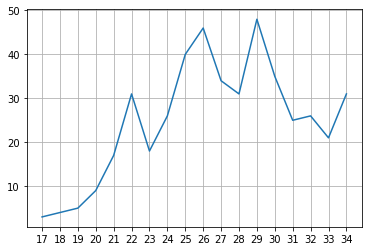

In [45]:
# Correlation between his age and the number of goals:
plt.plot(ronaldo_data["Age"], ronaldo_data["Goals"])
plt.xticks(ronaldo_data["Age"])
plt.grid()
plt.show()

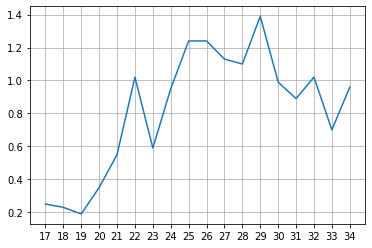

In [176]:
plt.plot(ronaldo_data["Age"], ronaldo_data["Goals per 90min"])
plt.xticks(ronaldo_data["Age"])
plt.grid()
plt.show()
# Similar to the upper graph
# It should be scary for the rival to know that Ronaldo will score at least 1 goal in the match 

### Let's check his performances with respect to the clubs

In [188]:
group_data = ronaldo_data.groupby(['Club']).sum()
group_data = group_data.drop(columns = "Age")

In [189]:
group_data

,Matches Played,Matches Started by CR7,Goals,Assists,Penalty Goals,Penalties Attempted,Yellow Cards,Red Cards,Goals per 90min
Club,,,,,,,,,
Juventus,64,63,52,13,17,19,6,0,1.66
Manchester Utd,196,157,84,44,11,13,29,4,2.93
Real Madrid,292,284,311,85,61,71,36,4,9.95
Sporting CP,25,11,3,3,0,0,1,0,0.25


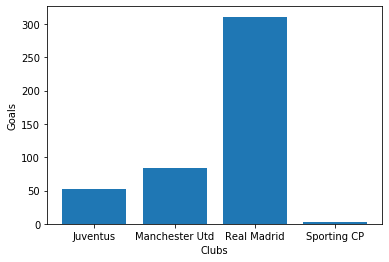

In [152]:
clubs = [club for club in grouped_data.index]

plt.bar(clubs,ronaldo_data.groupby(['Club']).sum()['Goals'])
plt.xticks(clubs)
plt.ylabel('Goals')
plt.xlabel('Clubs')
plt.show()

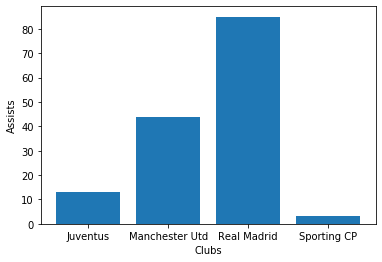

In [179]:
plt.bar(clubs,ronaldo_data.groupby(['Club']).sum()['Assists'])
plt.xticks(clubs)
plt.ylabel('Assists')
plt.xlabel('Clubs')
plt.show()

### Let's use linear regression model to have an idea about the number of goals he will score

In [13]:
m, b = np.polyfit(ronaldo_data["Age"], ronaldo_data["Goals"], 1)

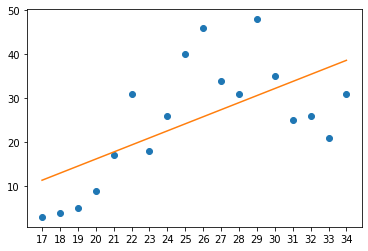

In [14]:
plt.xticks(ronaldo_data["Age"])
plt.plot(ronaldo_data["Age"], ronaldo_data["Goals"], 'o')
plt.plot(ronaldo_data["Age"], m*ronaldo_data["Age"] + b)

### Let's use the same to have an idea about the number of assists

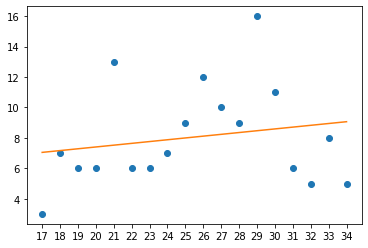

In [178]:
m, b = np.polyfit(ronaldo_data["Age"], ronaldo_data["Assists"], 1)
plt.xticks(ronaldo_data["Age"])
plt.plot(ronaldo_data["Age"], ronaldo_data["Assists"], 'o')
plt.plot(ronaldo_data["Age"], m*ronaldo_data["Age"] + b)

### Linear Regression With Marginal Distributions

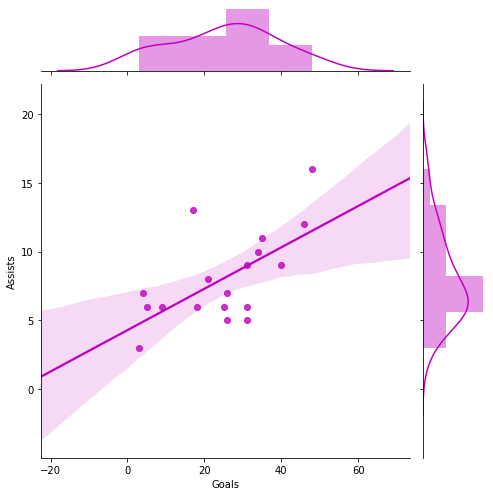

In [21]:
sns.jointplot(x="Goals", y="Assists", data=ronaldo_data,
                  kind="reg", truncate = False,
                  color="m", height=7)
# It can be seen that the season when he scored the highest number of his goals, his number of assists is the highest of his career